In [1]:
import pandas as pd
import numpy as np

#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# S&P 500 데이터

In [5]:
df_sp500 = pd.read_csv(r'D:\stock_data\^spx_d.csv',parse_dates=True,index_col=0)
df_sp500_month = df_sp500.loc[df_sp500.groupby(df_sp500.index.to_period('M')).apply(lambda x: x.index.max())]
df_sp500_month['Change'] = df_sp500_month['Close']/df_sp500_month['Close'].shift(1) - 1
df_sp500_month['Change12'] = df_sp500_month['Close']/df_sp500_month['Close'].shift(12) - 1
df_sp500_month = df_sp500_month[df_sp500_month.index > '1990-01-01']
df_sp500_month

,Open,High,Low,Close,Volume,Change,Change12
Date,,,,,,,
1990-01-31,322.98,329.08,322.98,329.08,2.107333e+08,-0.068817,0.106263
1990-02-28,330.26,333.48,330.16,331.89,2.048889e+08,0.008539,0.148965
1990-03-30,340.79,341.41,338.21,339.94,1.548222e+08,0.024255,0.152847
1990-04-30,329.11,331.31,327.76,330.80,1.363889e+08,-0.026887,0.068337
1990-05-31,360.86,361.84,360.23,361.23,1.841000e+08,0.091989,0.127012
1990-06-29,357.64,359.09,357.30,358.02,1.616778e+08,-0.008886,0.125920
1990-07-31,355.55,357.54,353.91,356.15,1.948667e+08,-0.005223,0.029097
1990-08-31,318.71,322.57,316.59,322.56,1.072000e+08,-0.094314,-0.082202
1990-09-28,300.97,306.05,295.98,306.05,2.233444e+08,-0.051184,-0.123443


# 미국 2년물 국채

In [8]:
b_df = pd.read_csv(r'D:\stock_data\2usy_b_d.csv',parse_dates=True,index_col=0)
b_df_month = b_df.loc[b_df.groupby(b_df.index.to_period('M')).apply(lambda x: x.index.max())]
b_df_month['Change'] = b_df_month['Close']/b_df_month['Close'].shift(1) - 1
b_df_month['Change12'] = b_df_month['Close']/b_df_month['Close'].shift(12) - 1
b_df_month.fillna(0, inplace=True)
b_df_month

,Open,High,Low,Close,Change,Change12
Date,,,,,,
1990-01-31,8.2800,8.2800,8.2800,8.2800,0.000000,0.000000
1990-02-28,8.4300,8.4300,8.4300,8.4300,0.018116,0.000000
1990-03-30,8.6400,8.6400,8.6400,8.6400,0.024911,0.000000
1990-04-30,8.9600,8.9600,8.9600,8.9600,0.037037,0.000000
1990-05-31,8.5000,8.5000,8.5000,8.5000,-0.051339,0.000000
1990-06-29,8.2400,8.2400,8.2400,8.2400,-0.030588,0.000000
1990-07-31,7.9100,7.9100,7.9100,7.9100,-0.040049,0.000000
1990-08-31,8.0700,8.0700,8.0700,8.0700,0.020228,0.000000
1990-09-28,8.0200,8.0200,8.0200,8.0200,-0.006196,0.000000


# 데이터 조인

In [12]:
df = pd.merge(df_sp500_month, b_df_month,left_index=True, right_index=True)
df = df[['Change_x','Change12_x','Change_y','Change12_y']]
df

,Change_x,Change12_x,Change_y,Change12_y
Date,,,,
1990-01-31,-0.068817,0.106263,0.000000,0.000000
1990-02-28,0.008539,0.148965,0.018116,0.000000
1990-03-30,0.024255,0.152847,0.024911,0.000000
1990-04-30,-0.026887,0.068337,0.037037,0.000000
1990-05-31,0.091989,0.127012,-0.051339,0.000000
1990-06-29,-0.008886,0.125920,-0.030588,0.000000
1990-07-31,-0.005223,0.029097,-0.040049,0.000000
1990-08-31,-0.094314,-0.082202,0.020228,0.000000
1990-09-28,-0.051184,-0.123443,-0.006196,0.000000


In [13]:
pd.options.mode.chained_assignment = None

# 리벨런씽

In [19]:
init_stock = 100
init_cash = 0
cash_rate = 0.001 # 현금이율을 월 0.1%고정
buy_and_hold = 100

df['return_bh'] = 0
df['return'] = 0
df['stock'] = 0
df['cash'] = 0

# 매월 rebalace
for index,row in df.iterrows():
    # 이전달 금액에서 수일률 적용
    init_stock = init_stock*(row['Change_x'] + 1)  
    init_cash = init_cash * (row['Change_y'] + 1)
    buy_and_hold = buy_and_hold*(row['Change_x'] + 1)
    
    # 데이터프레임에 저장
    df.loc[index,'return_bh'] = buy_and_hold
    df.loc[index,'return'] = init_stock + init_cash
    if row['Change12_x'] > 0 & (row['Change_x'] > row['Change_y']):
        df.loc[index,'stock'] = init_stock + init_cash
        df.loc[index,'cash'] = 0
    else:
        df.loc[index,'stock'] = 0
        df.loc[index,'cash'] = init_stock + init_cash
    
    # 다음 step으로 값전달    
    init_stock = df.loc[index,'stock']
    init_cash = df.loc[index,'cash']    
    buy_and_hold = df.loc[index,'return_bh']

In [20]:
df

,Change_x,Change12_x,Change_y,Change12_y,return_bh,return,stock,cash
Date,,,,,,,,
1990-01-31,-0.068817,0.106263,0.000000,0.000000,93.118280,93.118280,93.118280,0.000000
1990-02-28,0.008539,0.148965,0.018116,0.000000,93.913413,93.913413,93.913413,0.000000
1990-03-30,0.024255,0.152847,0.024911,0.000000,96.191285,96.191285,96.191285,0.000000
1990-04-30,-0.026887,0.068337,0.037037,0.000000,93.604980,93.604980,93.604980,0.000000
1990-05-31,0.091989,0.127012,-0.051339,0.000000,102.215620,102.215620,102.215620,0.000000
1990-06-29,-0.008886,0.125920,-0.030588,0.000000,101.307301,101.307301,101.307301,0.000000
1990-07-31,-0.005223,0.029097,-0.040049,0.000000,100.778155,100.778155,100.778155,0.000000
1990-08-31,-0.094314,-0.082202,0.020228,0.000000,91.273345,91.273345,0.000000,91.273345
1990-09-28,-0.051184,-0.123443,-0.006196,0.000000,86.601585,90.707834,0.000000,90.707834


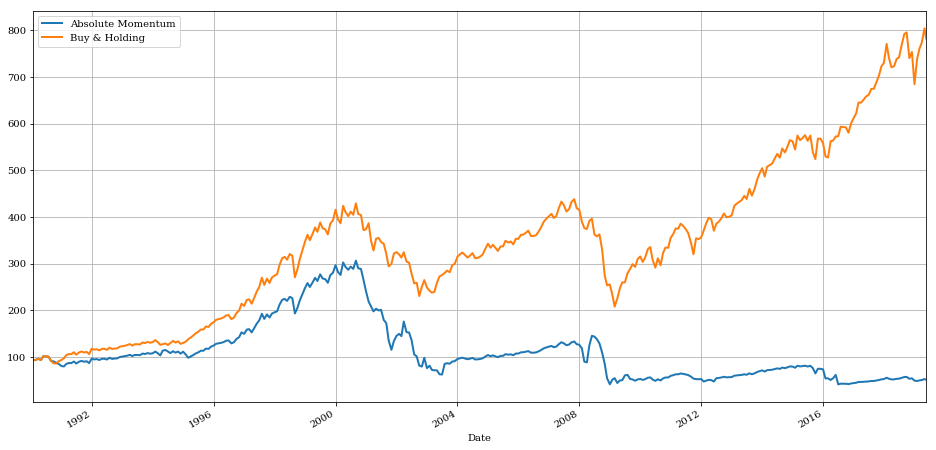

In [21]:
ax = df[['return','return_bh']].plot(figsize=(16,8))
ax.legend(["Absolute Momentum", "Buy & Holding"])